# Sales Prediction for Big Mart Outlets

# Data Dictionary

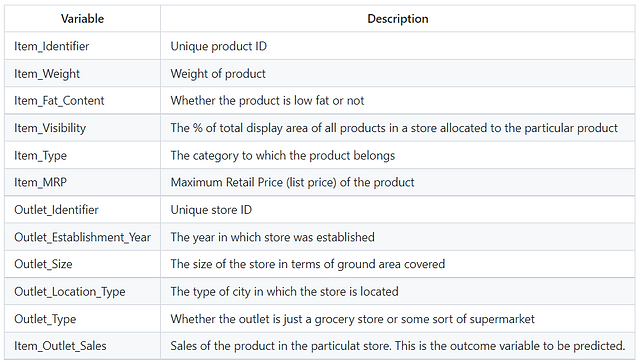

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd C:\Users\91628\Downloads

C:\Users\91628\Downloads


# Loading the Dataset

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train=pd.read_csv("train.csv")

# Checking the datatypes of each features

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
print(train.shape)
print(test.shape)
# Hackathons, Jobathons & Competitions - 3 files will be provided
# train file is complete data including depending variable(y) and this data must be used for buiding or training a model
# Test file will not have dependent variable(y) and needs to be predicted using the model built on train data
# sample submission file is where predicitions are copied and submitted to competition site for evalucation


(8523, 12)
(5681, 11)


In [8]:
# for preprocessing of data, concatenation of both train and test files must be done
# for concatenation the number of columns or variables must be same
# for purpose of concatenation, temporarily add dependent variable to test data and fill column with word 'test'

In [9]:
test['Item_Outlet_Sales']='test'

# Now will concat Train and Test data to perform Data Preprocessing

In [10]:
# combining the Train and Test Data 
# concatenation of both dataframes for processing

combinedf=pd.concat([train,test],axis=0)
# axis=0 is Row wise concatenation
# axis=1 is column wise concatenation

In [11]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [12]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [13]:
print(numcols.shape)
print(objcols.shape)

(14204, 4)
(14204, 8)


In [14]:
numcols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


# Now We have to impute item_weight

In [15]:
numcols.Item_Weight=numcols.Item_Weight.fillna(numcols.Item_Weight.mean())

# impute outlet_size

In [16]:
objcols.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

# impute with word "missing"

In [17]:
objcols.Outlet_Size=objcols.Outlet_Size.fillna("Missing")

In [18]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

# Have to create a new variable called Item_code based on Item_Identifier

In [19]:
objcols['Item_Code']=objcols.Item_Identifier.apply(lambda x:x[0:2])

In [20]:
objcols.Item_Code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [21]:
objcols.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [22]:
objcols.Item_Fat_Content=objcols.Item_Fat_Content.replace(['LF', 'low fat'],'Low Fat')

In [23]:
objcols.Item_Fat_Content=objcols.Item_Fat_Content.replace('reg','Regular')

In [24]:
objcols.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [25]:
for col in objcols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium     4655
Missing    4016
Small      3980
Hig

# create a new variable "Outlet_Age" as of 2022 using OutletEstablishment year

In [26]:
numcols['Outlet_Age']=2022-numcols.Outlet_Establishment_Year

In [27]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

# Data transformation for numeric variables,Independent variables

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# Now will drop those features where we have performed data preprocessing technique and now those columns are not useful for prediction

In [29]:
numcols_df=numcols.drop('Outlet_Establishment_Year',axis=1)

In [30]:
stdscaler=StandardScaler()

In [31]:
numcols_df_scaled=stdscaler.fit_transform(numcols_df)

In [32]:
numcols_df_scaled=pd.DataFrame(numcols_df_scaled,columns=numcols_df.columns)

In [33]:
numcols_df_scaled.head() # Standard Scaler scales into both negative and positive values. Some obs will be above and below
# mean (x-mean)/stddeviation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [34]:
# normalization or min max scaler - (x-xmin)/(xmax-xmin)
minmax=MinMaxScaler()

In [35]:
numcols_df_minmax=minmax.fit_transform(numcols_df)

In [36]:
numcols_df_minmax=pd.DataFrame(numcols_df_minmax,columns=numcols_df.columns)

In [37]:
numcols_df_minmax.head() # no negitive values and range is only 0 to 1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [38]:
# Robust Scaler uses Quartiles used in case of outliers
robust=RobustScaler()

In [39]:
numcols_df_robust=robust.fit_transform(numcols_df)

In [40]:
numcols_df_robust=pd.DataFrame(numcols_df_robust,columns=numcols_df.columns)

In [41]:
numcols_df_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


<Axes: >

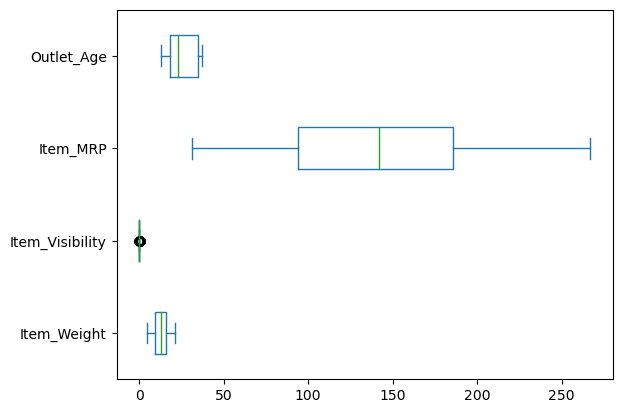

In [42]:
numcols_df.plot(kind='box',vert=False)

<Axes: >

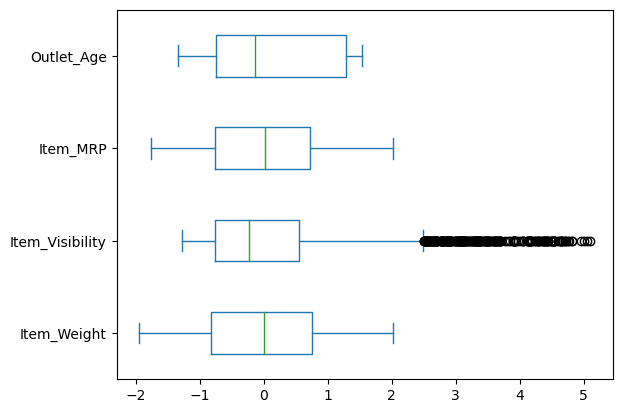

In [43]:
numcols_df_scaled.plot(kind='box',vert=False)

<Axes: >

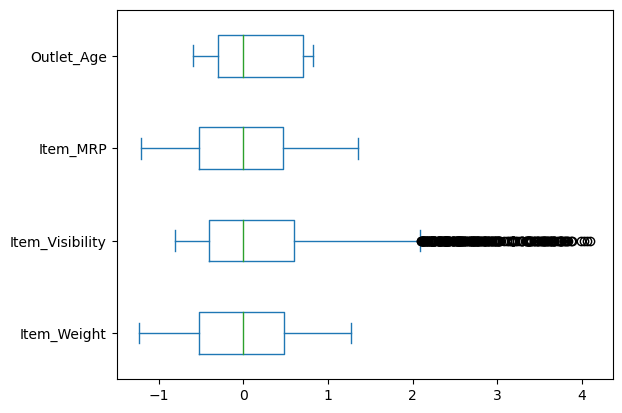

In [44]:
numcols_df_robust.plot(kind='box',vert=False)

# By Encoding Dummy variable

In [45]:
numcols_df['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

In [46]:
# Moving dependent variables Item_Outlet_Sales from object to numeric
objcols=objcols.drop('Item_Outlet_Sales',axis=1)

# Performing label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [49]:
objcols_encode=objcols.apply(le.fit_transform)

In [50]:
objcols_encode.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,156,0,4,9,1,0,1,1
1,8,1,14,3,1,2,2,0
2,662,0,10,9,1,0,1,1
3,1121,1,6,0,2,2,0,1
4,1297,0,9,1,0,2,1,2


In [51]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'],
      dtype='object')

# In machine learning, encoding techniques are used to convert categorical variables, such as text labels into numerical values, that can be used as input for a model because most of Machine learning model cannot understand text labels

In [52]:
objcols_dummy=pd.get_dummies(objcols,columns=[ 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'])

In [53]:
print(objcols.shape)
print(objcols_encode.shape)
print(objcols_dummy.shape)

(14204, 8)
(14204, 8)
(14204, 43)


In [54]:
objcols_dummy.head()

,Item_Identifier,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,FDA15,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [55]:
numcols_df_scaled=numcols_df_scaled.reset_index()

In [56]:
numcols_df_scaled=pd.DataFrame(numcols_df_scaled)

In [57]:
objcols_dummy=objcols_dummy.reset_index()

In [58]:
objcols_dummy=pd.DataFrame(objcols_dummy)

In [59]:
bigmart_df=pd.concat([numcols_df_scaled,objcols_dummy],axis=1)

In [60]:
numcols_df=numcols_df.reset_index()

In [61]:
bigmart_df['Item_Outlet_Sales']=numcols_df.Item_Outlet_Sales

In [62]:
bigmart_df.head()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,index,Item_Identifier,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC,Item_Outlet_Sales
0,0,-0.824939,-0.969852,1.752511,-0.139681,0,FDA15,1,0,0,...,0,0,0,1,0,0,0,1,0,3735.138
1,1,-1.623224,-0.907063,-1.493696,-1.334228,1,DRC01,0,1,0,...,0,1,0,0,1,0,1,0,0,443.4228
2,2,1.111729,-0.956000,0.009874,-0.139681,2,FDN15,1,0,0,...,0,0,0,1,0,0,0,1,0,2097.27
3,3,1.513233,-1.281712,0.661838,-0.020226,3,FDX07,0,1,0,...,0,1,1,0,0,0,0,1,0,732.38
4,4,-0.912325,-1.281712,-1.403623,1.293777,4,NCD19,1,0,0,...,0,1,0,1,0,0,0,0,1,994.7052


# spliting data back to train and test

In [63]:
train=bigmart_df[bigmart_df.Item_Outlet_Sales!='test']
test=bigmart_df[bigmart_df.Item_Outlet_Sales=='test']

In [64]:
test=test.drop('Item_Outlet_Sales',axis=1)

In [65]:
train=train.drop('index',axis=1)

In [66]:
test=test.drop('index',axis=1)

# Now our Feauture Engineering process is also over. So let's move on to model building

# Seperating Dependent and Independent Variable

In [67]:
Y=train.Item_Outlet_Sales
X=train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [68]:
print(X.shape)
print(test.shape)

(8523, 46)
(5681, 47)


In [69]:
import seaborn as sns

<Figure size 1000x500 with 0 Axes>

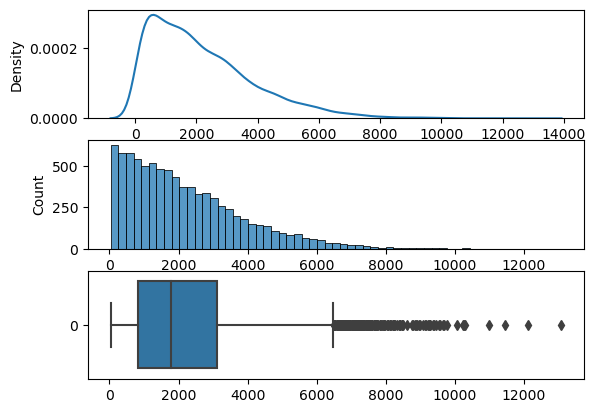

In [70]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(Y,ax=ax[0])
sns.histplot(Y,ax=ax[1])
sns.boxplot(Y,ax=ax[2],orient='h')
plt.show()


In [71]:
Y.dtype

dtype('O')

In [72]:
Y=Y.astype(float)

<Axes: >

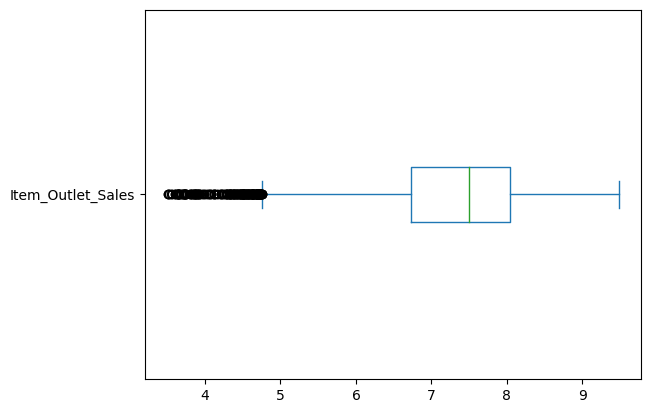

In [73]:
np.log(Y).plot(kind='box',vert=False)

In [74]:
Y.dtype

dtype('float64')

In [75]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,-0.824939,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.623224,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.111729,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.513233,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.912325,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg=LinearRegression()

In [78]:
regmodel=reg.fit(X,Y)

In [79]:
regmodel.score(X,Y) # less than 0.60 - model is underfitting

0.5637703210729321

In [80]:
regmodel2=reg.fit(X,np.log(Y)) # Logarthemic Transformation of y

In [81]:
regmodel2.score(X,np.log(Y)) # Not Underfitting

0.7213876107899384

In [82]:
regmodel2_predict=np.exp(regmodel2.predict(X))

In [83]:
regmodel_predict=regmodel.predict(X)

In [84]:
regmodel2_resid=Y-regmodel2_predict

In [85]:
regmodel_resid=Y-regmodel_predict

In [86]:
np.sqrt(np.mean(regmodel2_resid**2))

1140.0366020922504

In [87]:
np.sqrt(np.mean(regmodel_resid**2))

2763.3203222999928

In [88]:
test=test.drop('Item_Identifier',axis=1)

In [89]:
# predication on test data
reg_test_predict=regmodel2.predict(test)

In [90]:
reg_test_predict=np.exp(reg_test_predict)

In [91]:
reg_test_predict

array([1431.38319148, 1137.23484302,  593.60168724, ..., 1468.99895371,
       3619.42286433, 1091.26761929])

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
tree=DecisionTreeRegressor(max_depth=8)

In [94]:
treemodel=tree.fit(X,np.log(Y))

In [95]:
treemodel.score(X,np.log(Y)) # R Square

0.767890355332978

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
cross_val_score(tree,X,np.log(Y))

array([0.69884206, 0.68524152, 0.68777701, 0.68466965, 0.72730802])

# RandomForest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
RF=RandomForestRegressor(n_estimators=3000,max_depth=8)

In [100]:
RFmodel=RF.fit(X,np.log(Y))

In [101]:
RFmodel.score(X,np.log(Y))

0.7793419992684251

# Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gb=GradientBoostingRegressor(n_estimators=3000)

In [104]:
gbmodel=gb.fit(X,np.log(Y))

In [105]:
gbmodel.score(X,np.log(Y))

0.9032532995184691

In [106]:
gb_test_pred=gbmodel.predict(test)

In [107]:
pd.DataFrame(gb_test_pred).to_csv("gbb.csv")

# Hence after hypertuning I got RandomForest as my best model with 70% accuracy